<a href="https://colab.research.google.com/github/askarernist/Kaggle/blob/main/Week_13%20DB_Time_Series_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SQLite Pandas Examples

In [ ]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [ ]:
with con:
    con.execute("""
        CREATE TABLE USER (
            id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            age INTEGER
        );
    """)

In [ ]:
sql = 'INSERT INTO USER (id, name, age) values(?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3, 'Chris', 23)
]

In [ ]:
with con:
    con.executemany(sql, data)

In [ ]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age <= 22")
    for row in data:
        print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


Integrate SQLite with Pandas

In [ ]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [ ]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
    SELECT s.user_id, u.name, u.age, s.skill 
    FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
''', con)

df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [ ]:
df.to_sql('USER_SKILL', con)

**Using SQLite as a Time Series Database**
SQLite supports five *date* and *time* functions as follows:


1.   date(timestring, modifier, modifier, ...)
2.   time(timestring, modifier, modifier, ...)
3. datetime(timestring, modifier, modifier, ...)
4. julianday(timestring, modifier, modifier, ...)
5. strftime(format, timestring, modifier, modifier, ...)

All five date and time functions take a time string as an argument. The time string is followed by zero or more modifiers. The strftime() function also takes a format string as its first argument. With these date and time functions, we can save time series data into a SQLite database so as to use SQLite as a time series database.

In this subsection, we will create a table to save man-made temperature data at different dates and times. You can presume that they are collected from some kind of temperature sensors.

This subsection notebook will present:



*   Practice date and time functions
*   Create a temperature table and index
*   Insert data into the temperature table
*   Query







In [1]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

1. **Connect to database**

---


It was mentioned before the demo.db3 is extracted from a hydrological modelling. As a result, the data in each table is tidy and complete without NULL values. However, we can create a table with NULL values for demo.

In [2]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

2. **Play with date and time functions**

---


You can find more example from lang_datefunc or sqlite_date_time

**Compute the current date.**

In [3]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-24


**Compute the last day of the current month.**

In [4]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:///demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2022-11-30


3. **Create a table of time series temperature**

---


3.1 Create table
only with two columns of timestamp and Temperature

In [5]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

3.2 **Create an index:** 
For efficient querying, we'll want to index the timestamp column.

In [6]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

3.3 **Insert data**: Make 500 rows of data and temperature ranges between 18 to 26.

In [7]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows - i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature); 

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

4. **Play with time series table**: 4.1 Simple Query

In [8]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-07-12 07:57:01,21.325912656689802
2021-07-13 07:57:01,21.610988931296575
2021-07-14 07:57:01,18.853089426702837
2021-07-15 07:57:01,21.437927742352713
2021-07-16 07:57:01,19.278663566166028


4.2 Filter with a datetime

In [9]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-07-12 07:57:01.801022,21.325912656689802
2021-07-13 07:57:01.801022,21.610988931296575
2021-07-14 07:57:01.801022,18.853089426702837
2021-07-15 07:57:01.801022,21.437927742352713
2021-07-16 07:57:01.801022,19.278663566166028
2021-07-17 07:57:01.801022,23.712406522529257
2021-07-18 07:57:01.801022,25.76438960305537
2021-07-19 07:57:01.801022,20.031057171146642
2021-07-20 07:57:01.801022,18.038835637743922
2021-07-21 07:57:01.801022,22.437479311598118


4.3 Query data at a specific year
Use CAST string to integer as strftime returns a string.

In [10]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-07-12 07:57:01.801022,21.325912656689802
2021-07-13 07:57:01.801022,21.610988931296575
2021-07-14 07:57:01.801022,18.853089426702837
2021-07-15 07:57:01.801022,21.437927742352713
2021-07-16 07:57:01.801022,19.278663566166028
2021-07-17 07:57:01.801022,23.712406522529257
2021-07-18 07:57:01.801022,25.76438960305537
2021-07-19 07:57:01.801022,20.031057171146642
2021-07-20 07:57:01.801022,18.038835637743922
2021-07-21 07:57:01.801022,22.437479311598118


4.5 Aggregate yearly

In [11]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,21.80619485786688,25.985190175087407,18.017411165338732
2022,22.057973953829006,25.970475581432126,18.060776272547447


5. **Visualization**: Here we convert SQL query results into Pandas DataFrame.

In [12]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True) 
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-07-12 07:57:01', '2021-07-13 07:57:01',
               '2021-07-14 07:57:01', '2021-07-15 07:57:01',
               '2021-07-16 07:57:01', '2021-07-17 07:57:01',
               '2021-07-18 07:57:01', '2021-07-19 07:57:01',
               '2021-07-20 07:57:01', '2021-07-21 07:57:01',
               ...
               '2022-11-14 07:57:01', '2022-11-15 07:57:01',
               '2022-11-16 07:57:01', '2022-11-17 07:57:01',
               '2022-11-18 07:57:01', '2022-11-19 07:57:01',
               '2022-11-20 07:57:01', '2022-11-21 07:57:01',
               '2022-11-22 07:57:01', '2022-11-23 07:57:01'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

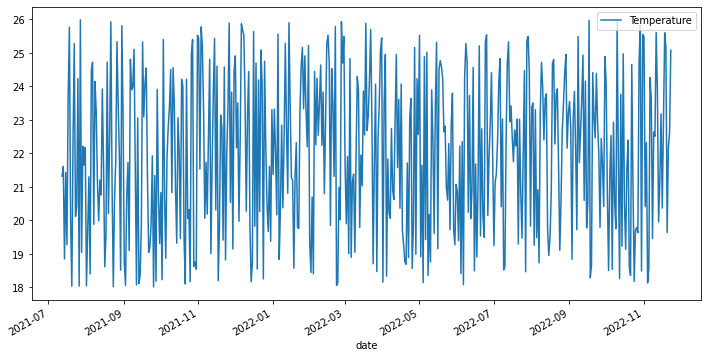

In [13]:
df.plot(figsize=(12, 6))

**Summary and References**

---


Time series databases (TSDBs) are getting popular these days. There are quite a few TSDbs such as InfluxDB, Graphite, Druid, Kairos, and Prometheus. With the SQLite date and time functions, we can save time series data into a SQLite database so as to use SQLite as a time series database.

Ref: https://www.sqlite.org/lang_datefunc.html